Joseph Breneman: Navigating the Night Sky-One Month Later
=================================================

In [1]:
import numpy as np
import pandas as pd
from astroplan import Observer
from astropy import coordinates
from astropy.coordinates import EarthLocation
from astropy.time import Time
from astroplan.plots import plot_airmass
from astropy.coordinates import get_sun, get_body, get_moon
from astroplan import moon_illumination
from astroplan import MoonSeparationConstraint, observability_table
import astropy.units as u
from astroplan import AltitudeConstraint, AirmassConstraint, AtNightConstraint
from astroplan import Constraint
from astropy.coordinates import SkyCoord
from astroplan import FixedTarget

## Reading in data (Name, RA, and DEC) for 97 Quasars from the Milliquas database

In [2]:
quasars=pd.read_fwf('quasars3.txt', skiprows=4, delimiter='|')
quasars[0:10]

,name,ra,dec
0,WISEA J055431.47-431632.4,05 54 31.48,-43 16 32.5
1,WISEA J095244.92-431631.2,09 52 44.93,-43 16 31.3
2,WISEA J050310.49-431630.1,05 03 10.49,-43 16 30.1
3,WISEA J200949.47-431629.9,20 09 49.48,-43 16 30.0
4,WISEA J130532.19-431629.1,13 05 32.20,-43 16 29.2
5,WISEA J213253.22-431629.1,21 32 53.22,-43 16 29.2
6,WISEA J125759.35-431627.0,12 57 59.36,-43 16 27.1
7,WISEA J095142.02-431626.9,09 51 42.02,-43 16 26.9
8,WISEA J122754.06-431626.5,12 27 54.07,-43 16 26.5
9,WISEA J053425.45-431624.3,05 34 25.46,-43 16 24.3


## Defining our observation location, The Du Pont 2.5m telescope at Las Campanas Observatory in Chile.

In [3]:
dupont=Observer.at_site("lco")
dupont

<Observer: name='lco',
    location (lon, lat, el)=(-70.70166666666665 deg, -29.003333333333327 deg, 2281.9999999994607 m),
    timezone=<UTC>>

## Now we are going to use FixedTarget with SkyCoord coordinates to feed our data into an observability table.

In [4]:
table_values=quasars.as_matrix()

targets=[FixedTarget(coord=SkyCoord(RA, DEC, unit=[u.hour,u.deg]), name=Name)
           for Name, RA, DEC in table_values]

targets[0:10]

/Users/josephbreneman/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


[<FixedTarget "WISEA J055431.47-431632.4" at SkyCoord (ICRS): (ra, dec) in deg (88.63116667, -43.27569444)>,
 <FixedTarget "WISEA J095244.92-431631.2" at SkyCoord (ICRS): (ra, dec) in deg (148.18720833, -43.27536111)>,
 <FixedTarget "WISEA J050310.49-431630.1" at SkyCoord (ICRS): (ra, dec) in deg (75.79370833, -43.27502778)>,
 <FixedTarget "WISEA J200949.47-431629.9" at SkyCoord (ICRS): (ra, dec) in deg (302.45616667, -43.275)>,
 <FixedTarget "WISEA J130532.19-431629.1" at SkyCoord (ICRS): (ra, dec) in deg (196.38416667, -43.27477778)>,
 <FixedTarget "WISEA J213253.22-431629.1" at SkyCoord (ICRS): (ra, dec) in deg (323.22175, -43.27477778)>,
 <FixedTarget "WISEA J125759.35-431627.0" at SkyCoord (ICRS): (ra, dec) in deg (194.49733333, -43.27419444)>,
 <FixedTarget "WISEA J095142.02-431626.9" at SkyCoord (ICRS): (ra, dec) in deg (147.92508333, -43.27413889)>,
 <FixedTarget "WISEA J122754.06-431626.5" at SkyCoord (ICRS): (ra, dec) in deg (186.97529167, -43.27402778)>,
 <FixedTarget "WISEA

In [5]:
from astropy.table import Table
from astroplan import is_observable, is_always_observable, months_observable
from astroplan.utils import time_grid_from_range

In [6]:
# Now we are going to make a mask of constraining factors that we will fit into our observing table to rule out
# any objects that won't be observable during our observing window.
constraints=[AirmassConstraint(1.5), AtNightConstraint.twilight_astronomical(), MoonSeparationConstraint(35*u.deg)]

# Now we will define our observing time window.
beginning=Time(['2019-06-15'])
end=Time(['2019-06-30'])

window_range=[beginning, end]
window_time_grid=time_grid_from_range(window_range)
observation_range=Time(['2019-06-15','2019-06-30'])

observing_table=observability_table(constraints, dupont, targets, time_range=observation_range)
observing_table

target name,ever observable,always observable,fraction of time observable
str25,bool,bool,float64
WISEA J055431.47-431632.4,False,False,0.0
WISEA J095244.92-431631.2,True,False,0.05277777777777778
WISEA J050310.49-431630.1,False,False,0.0
WISEA J200949.47-431629.9,True,False,0.21944444444444444
WISEA J130532.19-431629.1,True,False,0.18611111111111112
WISEA J213253.22-431629.1,True,False,0.17083333333333334
WISEA J125759.35-431627.0,True,False,0.18055555555555555
WISEA J095142.02-431626.9,True,False,0.05138888888888889
WISEA J122754.06-431626.5,True,False,0.1597222222222222


In [7]:
obs=observing_table['ever observable']==True
print('The number of observable objects is:', obs.sum())

The number of observable objects is: 71


## Now since we have 71 objects that are observable we are going to narrow it down to the top ten objects with the longest amount of viewing time available for our time window.

In [9]:
observing_table1=observing_table.to_pandas()

#This mask will sort out the top ten objects for the best viewing, this took a little fine tuning.
mask=observing_table1['fraction of time observable'] >= 0.2

observable=observing_table1[mask]['target name']
observable

3     WISEA J200949.47-431629.9
10    WISEA J134136.66-431624.0
21    WISEA J201514.03-431614.3
26    WISEA J191120.08-431611.9
28    WISEA J201945.20-431611.7
30    WISEA J140608.56-431610.3
31    WISEA J200428.50-431609.6
33    WISEA J201544.70-431608.6
74    WISEA J150803.55-431536.1
88    WISEA J144407.40-431524.6
94    WISEA J192858.88-431519.1
Name: target name, dtype: object

In [10]:
# Now we are going to extract our 10 most favorable objects from our FixedTarget list to define a tuple containing 
# only those targets.
target_10=(targets[3], targets[10], targets[21], targets[26], targets[28], targets[30], targets[31], 
        targets[33], targets[74], targets[88])
target_10

(<FixedTarget "WISEA J200949.47-431629.9" at SkyCoord (ICRS): (ra, dec) in deg (302.45616667, -43.275)>,
 <FixedTarget "WISEA J134136.66-431624.0" at SkyCoord (ICRS): (ra, dec) in deg (205.40279167, -43.27336111)>,
 <FixedTarget "WISEA J201514.03-431614.3" at SkyCoord (ICRS): (ra, dec) in deg (303.80845833, -43.27066667)>,
 <FixedTarget "WISEA J191120.08-431611.9" at SkyCoord (ICRS): (ra, dec) in deg (287.83366667, -43.26997222)>,
 <FixedTarget "WISEA J201945.20-431611.7" at SkyCoord (ICRS): (ra, dec) in deg (304.93833333, -43.26994444)>,
 <FixedTarget "WISEA J140608.56-431610.3" at SkyCoord (ICRS): (ra, dec) in deg (211.53570833, -43.26955556)>,
 <FixedTarget "WISEA J200428.50-431609.6" at SkyCoord (ICRS): (ra, dec) in deg (301.11875, -43.26933333)>,
 <FixedTarget "WISEA J201544.70-431608.6" at SkyCoord (ICRS): (ra, dec) in deg (303.93629167, -43.26908333)>,
 <FixedTarget "WISEA J150803.55-431536.1" at SkyCoord (ICRS): (ra, dec) in deg (227.01483333, -43.26005556)>,
 <FixedTarget "WIS

## Airmass plot, becuase it will give us the optimal time for viewing, on the optimal night (5/30/2019), and they're cool looking.

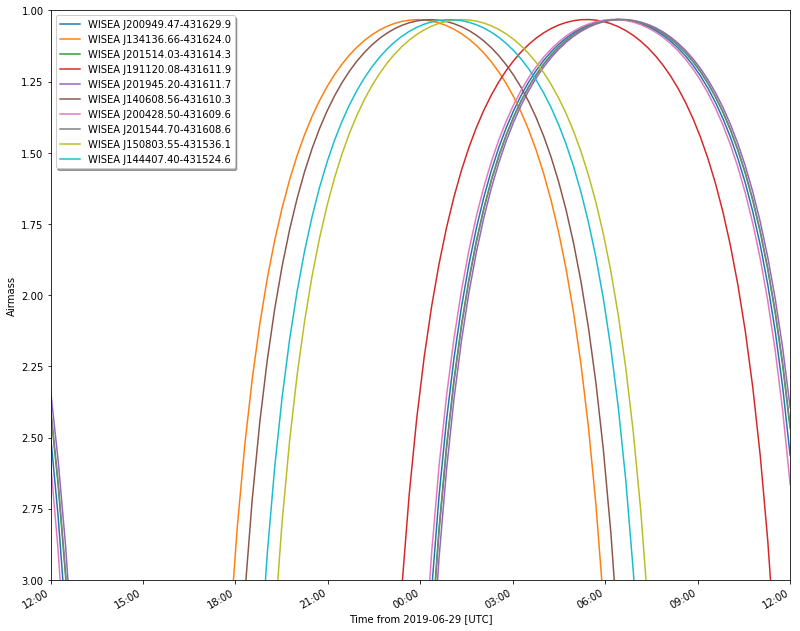

In [11]:
import matplotlib.pyplot as plt
from astroplan.plots import plot_airmass

fig,ax = plt.subplots(1,1)
fig.set_size_inches(11,8.5) 

fig.tight_layout()

observation_time = Time('2019-06-30')
plot_airmass(target_10, dupont, observation_time)
ax.legend(loc=0,shadow=True)
plt.show()


The Moon
========

In [13]:
#We can now establish the moon illumination, phase and position during our observing time window.

time=np.arange('2019-06-15', '2019-06-30', dtype='datetime64[D]')
start_time=(['2019-06-15'])
end_time=(['2019-06-30'])

moon_position=dupont.moon_altaz(time)

moon_ratio=dupont.moon_illumination(time)
moon_ratio

moon_phase = dupont.moon_phase(time)
print('The moon phase as a value of radians. 0 = full moon, π = new moon.\n', moon_phase)

The moon phase as a value of radians. 0 = full moon, π = new moon.
 [0.50441993 0.29016899 0.08412567 0.13421918 0.33432467 0.53235461
 0.72716788 0.91928907 1.10964741 1.29941667 1.4899413  1.68266576
 1.87904658 2.08044284 2.2879875 ] rad


In [14]:
print('The percentage of full moon brightness during observation window:\n', moon_ratio*100)

The percentage of full moon brightness during observation window:
 [93.77274847 97.90977701 99.8231761  99.55030602 97.23160603 93.08071736
 87.35300329 80.31928115 72.24886514 63.40304289 54.03834761 44.418188
 34.83040865 25.60656439 17.13648097]


In [15]:
print(moon_position)

<SkyCoord (AltAz: obstime=['2019-06-15T00:00:00.000000000' '2019-06-16T00:00:00.000000000'
 '2019-06-17T00:00:00.000000000' '2019-06-18T00:00:00.000000000'
 '2019-06-19T00:00:00.000000000' '2019-06-20T00:00:00.000000000'
 '2019-06-21T00:00:00.000000000' '2019-06-22T00:00:00.000000000'
 '2019-06-23T00:00:00.000000000' '2019-06-24T00:00:00.000000000'
 '2019-06-25T00:00:00.000000000' '2019-06-26T00:00:00.000000000'
 '2019-06-27T00:00:00.000000000' '2019-06-28T00:00:00.000000000'
 '2019-06-29T00:00:00.000000000'], location=(1845655.49905341, -5270856.2947176, -3075330.77760682) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt, distance) in (deg, deg, m)
    [( 78.83809533,  48.78027156, 3.76500501e+08),
     ( 90.31276731,  39.29903186, 3.80600232e+08),
     ( 98.62437936,  29.10728712, 3.85116512e+08),
     (105.10382774,  18.66024573, 3.89862290e+08),
     (110.53473612,   8.19091056, 3.94597383e+08),
     (115.41310951,  -2.17904712, 3.99045

## We already established in our observation constraints mask that none of our Quasars are within 35˚ angular distance of the moon

## To achieve a good "Dark" observation time, we would want to observe towards the end of the month (5/29/2019 and 5/30/2019 would be the two optimal dates for observing) when the phase is within a couple of days of a New Moon.

## The moon phase during our observing window starts as a Waxing Gibbous (05/15/2019), then moves to a Full Moon (05/18/2019), and ends as a Waning Crescent (05/30/2019). These phases were cross-checked with [Moon Phases May 2019](https://www.calendar-12.com/moon_calendar/2019/june).